# How many newspaper titles are available for each year in the Chronicling America collection?

To answer this question, we'll use the Python library pandas, which is intended for data analysis. The ultimate goal is to create a CSV file with a column for each year and a column with the count of titles available for that year.

I'm still wrapping my brain around pandas and I'm sure there are other ways to achieve similar results more efficiently. Let me know!

The initial steps of this workbook are from the "Read a Plain Text File of Newspapers into a DataFrame" notebook posted by the Library of Congress at https://github.com/LibraryOfCongress/data-exploration/blob/master/Newspapers.txt.ipynb 

In [538]:
import pandas as pd

The newspapers.txt file on Chronicling America is delimited by the pipe | character, not a comma, with spaces around it. You can read it into a pandas DataFrame with the following command. Note we have to specify the python engine because we have to use a regex (regular expression) to define the separator. Also, we're not bringing in the final column from the original file, which is a "more info" link. 

In [539]:
papers = pd.read_csv('http://chroniclingamerica.loc.gov/newspapers.txt', sep=' \| ', skipinitialspace=True, usecols=[0,1,2,3,4,5,6,7,8], engine='python')

In [540]:
type(papers)

pandas.core.frame.DataFrame

Here's what the first few lines of the initial data looks like: 

In [541]:
papers.head()

,Persistent Link,State,Title,LCCN,OCLC,ISSN,No. of Issues,First Issue Date,Last Issue Date
0,http://chroniclingamerica.loc.gov/lccn/sn85025...,Alabama,"Chattanooga daily rebel. (Selma, Ala.) 1865-1865",sn85025905,2638820,2328-5869,3,"April 19, 1865","April 27, 1865"
1,http://chroniclingamerica.loc.gov/lccn/sn82015...,Alabama,"The Chattanooga Daily Rebel. (Chattanooga, Ten...",sn82015209,8807897,2328-5826,228,"Aug. 9, 1862","April 22, 1864"
2,http://chroniclingamerica.loc.gov/lccn/sn82014...,Alabama,"The daily Chattanooga rebel. (Griffin, Ga.) 18...",sn82014371,8793427,2328-5761,41,"June 9, 1864","April 15, 1865"
3,http://chroniclingamerica.loc.gov/lccn/sn83045...,Alabama,"Memphis daily appeal. (Memphis, Tenn.) 1847-1886",sn83045160,9355541,2166-1898,8088,"Jan. 1, 1857","Jan. 27, 1886"
4,http://chroniclingamerica.loc.gov/lccn/sn94051...,Arizona,"The argus. (Holbrook, Ariz.) 1895-1900",sn94051341,25084608,2375-169X,220,"Dec. 12, 1895","May 5, 1900"


How many papers are listed in the set?

In [542]:
len(papers.index)

2240

Some of these fields in the Last Issue Date have trailing delimiters. Let's use a regular expression to remove a space followed by a | in those cells. 

In [543]:
papers["Last Issue Date"] = papers["Last Issue Date"].str.replace('(\s+\|)', '')

Now convert each of those dates to a datetime format. That will make it easier to pull out just the year later on. 

In [544]:
papers["First Issue Date"] = pd.to_datetime(papers["First Issue Date"])

In [545]:
papers["Last Issue Date"] = pd.to_datetime(papers["Last Issue Date"])

What data type is the Issue date column?

In [546]:
papers["Last Issue Date"].dtype

dtype('<M8[ns]')

That will work. So what does the data look like with the dates converted to date formats?

In [374]:
papers.head()

,Persistent Link,State,Title,LCCN,OCLC,ISSN,No. of Issues,First Issue Date,Last Issue Date
0,http://chroniclingamerica.loc.gov/lccn/sn85025...,Alabama,"Chattanooga daily rebel. (Selma, Ala.) 1865-1865",sn85025905,2638820,2328-5869,3,1865-04-19,1865-04-27
1,http://chroniclingamerica.loc.gov/lccn/sn82015...,Alabama,"The Chattanooga Daily Rebel. (Chattanooga, Ten...",sn82015209,8807897,2328-5826,228,1862-08-09,1864-04-22
2,http://chroniclingamerica.loc.gov/lccn/sn82014...,Alabama,"The daily Chattanooga rebel. (Griffin, Ga.) 18...",sn82014371,8793427,2328-5761,41,1864-06-09,1865-04-15
3,http://chroniclingamerica.loc.gov/lccn/sn83045...,Alabama,"Memphis daily appeal. (Memphis, Tenn.) 1847-1886",sn83045160,9355541,2166-1898,8088,1857-01-01,1886-01-27
4,http://chroniclingamerica.loc.gov/lccn/sn94051...,Arizona,"The argus. (Holbrook, Ariz.) 1895-1900",sn94051341,25084608,2375-169X,220,1895-12-12,1900-05-05


Now let's pull out the years and put them into their own new columns.

In [553]:
papers["Start"] = papers["First Issue Date"].dt.year

In [554]:
papers["Last"] = papers["Last Issue Date"].dt.year

In [555]:
papers.head()

,Persistent Link,State,Title,LCCN,OCLC,ISSN,No. of Issues,First Issue Date,Last Issue Date,Start,Last
0,http://chroniclingamerica.loc.gov/lccn/sn85025...,Alabama,"Chattanooga daily rebel. (Selma, Ala.) 1865-1865",sn85025905,2638820,2328-5869,3,1865-04-19,1865-04-27,1865,1865
1,http://chroniclingamerica.loc.gov/lccn/sn82015...,Alabama,"The Chattanooga Daily Rebel. (Chattanooga, Ten...",sn82015209,8807897,2328-5826,228,1862-08-09,1864-04-22,1862,1864
2,http://chroniclingamerica.loc.gov/lccn/sn82014...,Alabama,"The daily Chattanooga rebel. (Griffin, Ga.) 18...",sn82014371,8793427,2328-5761,41,1864-06-09,1865-04-15,1864,1865
3,http://chroniclingamerica.loc.gov/lccn/sn83045...,Alabama,"Memphis daily appeal. (Memphis, Tenn.) 1847-1886",sn83045160,9355541,2166-1898,8088,1857-01-01,1886-01-27,1857,1886
4,http://chroniclingamerica.loc.gov/lccn/sn94051...,Arizona,"The argus. (Holbrook, Ariz.) 1895-1900",sn94051341,25084608,2375-169X,220,1895-12-12,1900-05-05,1895,1900


Just for kicks, let's create a new dataframe with a row for each year of a title's coverage. This might be useful for other purposes later on. 

In [556]:
years_df = pd.DataFrame(columns=("State","Title","Year"))
years_df.head()

,State,Title,Year


In [557]:
# For each title in the original dataframe, 
# create a range for the years from Start to Last. 
# Then add a new row for each year of coverage. 
for i in range(len(papers.index)):
    for year in range(papers.loc[i]["Start"], (papers.loc[i]["Last"] + 1)):
        s = pd.Series({"State": papers.loc[i]["State"], "Title": papers.loc[i]["Title"], "Year": year})
        years_df.loc[len(years_df)]= s.astype(str)
        

How many rows are in this new dataframe?

In [558]:
len(years_df.index)

24146

In [559]:
years_df.head()

,State,Title,Year
0,Alabama,"Chattanooga daily rebel. (Selma, Ala.) 1865-1865",1865
1,Alabama,"The Chattanooga Daily Rebel. (Chattanooga, Ten...",1862
2,Alabama,"The Chattanooga Daily Rebel. (Chattanooga, Ten...",1863
3,Alabama,"The Chattanooga Daily Rebel. (Chattanooga, Ten...",1864
4,Alabama,"The daily Chattanooga rebel. (Griffin, Ga.) 18...",1864


That's a useful table. Let's save it as CSV, without the index column. 

In [483]:
years_df.to_csv(path_or_buf="years-list.csv", index=False)

Now roll up this list by year, with a show the count for each year, and put in a new DataFrame. 

In [560]:
years_count_df = pd.DataFrame(years_df.groupby(["Year"]).size())

In [561]:
years_count_df.head()

,0
Year,
1789,2
1790,2
1791,3
1792,3
1793,3


In [562]:
len(years_count_df)

118

That's not enough years between 1789 and 1924, so some years must be missing. We'll need to find and insert those years, with a count of 0. Then we need to sort the index so that those new index values fall into place in the timeline, rather than being added at the end. 

In [563]:
#need to identify missing years (e.g. 1810s) and add a count of 0
for y in range(1789,1925):
    x = str(y)
    if x not in years_count_df.index.values:
        years_count_df.loc[x]=[0]

years_count_df.index.tolist()


['1789',
 '1790',
 '1791',
 '1792',
 '1793',
 '1794',
 '1795',
 '1796',
 '1797',
 '1798',
 '1799',
 '1800',
 '1801',
 '1802',
 '1803',
 '1804',
 '1805',
 '1806',
 '1807',
 '1808',
 '1809',
 '1828',
 '1829',
 '1830',
 '1831',
 '1832',
 '1833',
 '1834',
 '1835',
 '1836',
 '1837',
 '1838',
 '1839',
 '1840',
 '1841',
 '1842',
 '1843',
 '1844',
 '1845',
 '1846',
 '1847',
 '1848',
 '1849',
 '1850',
 '1851',
 '1852',
 '1853',
 '1854',
 '1855',
 '1856',
 '1857',
 '1858',
 '1859',
 '1860',
 '1861',
 '1862',
 '1863',
 '1864',
 '1865',
 '1866',
 '1867',
 '1868',
 '1869',
 '1870',
 '1871',
 '1872',
 '1873',
 '1874',
 '1875',
 '1876',
 '1877',
 '1878',
 '1879',
 '1880',
 '1881',
 '1882',
 '1883',
 '1884',
 '1885',
 '1886',
 '1887',
 '1888',
 '1889',
 '1890',
 '1891',
 '1892',
 '1893',
 '1894',
 '1895',
 '1896',
 '1897',
 '1898',
 '1899',
 '1900',
 '1901',
 '1902',
 '1903',
 '1904',
 '1905',
 '1906',
 '1907',
 '1908',
 '1909',
 '1910',
 '1911',
 '1912',
 '1913',
 '1914',
 '1915',
 '1916',
 '1917',
 

Oops, those new rows got added at the end, which won't make sense for time-ordered data. Let's sort the index. 

In [564]:
years_count_df.sort_index(inplace=True)

In [565]:
len(years_count_df)


136

Now to create a chart showing the numbers of papers each year. 

In [566]:
% matplotlib inline

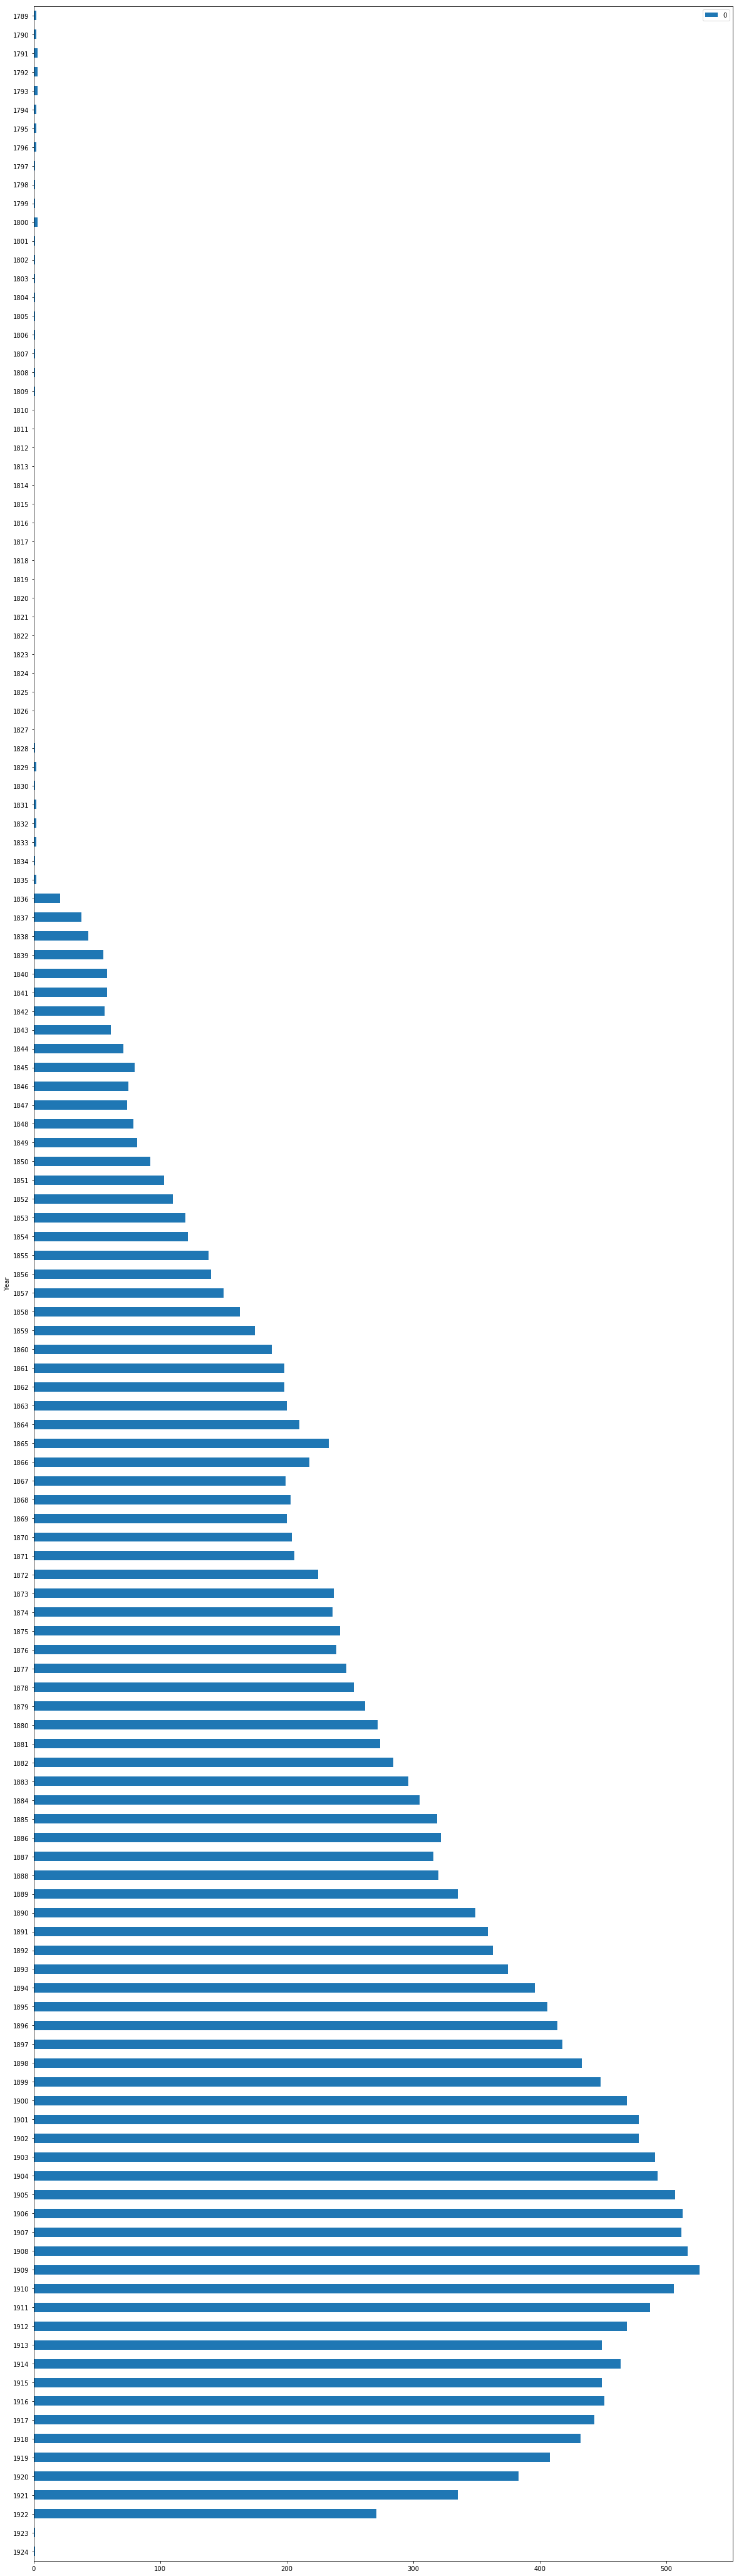

In [567]:
years_count_df.plot(kind='barh', figsize=(20,75)).invert_yaxis()

Let's save this data to CSV! This file will be useful in other applications for examining the data. 

In [568]:
years_count_df.to_csv(path_or_buf="final-counts.csv")

Change of pace: want to hear a sonification of this graph? I posted [a sound file on Soundcloud](https://soundcloud.com/laurasaurus5/chronicling-america-titles-over-time). Be sure to read the description to get the details on what you're hearing. 

So what are the min and max counts? How many years altogether in this file? 

In [570]:
years_count_df.describe()

,0
count,136.000000
mean,177.544118
std,179.249252
min,0.000000
25%,1.000000
50%,130.000000
75%,320.500000
max,526.000000


One other way to look at the data from one of the earlier dataframes is to group by year and then group within that by state. (We're going to ignore the years with no titles.)

In [402]:
years_df.groupby(["Year","State"]).size()

Year  State               
1789  New York                 1
      Pennsylvania             1
1790  New York                 1
      Pennsylvania             1
1791  New York                 1
      Pennsylvania             2
1792  New York                 1
      Pennsylvania             2
1793  New York                 1
      Pennsylvania             2
1794  Pennsylvania             2
1795  Pennsylvania             2
1796  Pennsylvania             2
1797  Pennsylvania             1
1798  Pennsylvania             1
1799  Pennsylvania             1
1800  District of Columbia     1
      Pennsylvania             2
1801  District of Columbia     1
1802  District of Columbia     1
1803  District of Columbia     1
1804  District of Columbia     1
1805  District of Columbia     1
1806  District of Columbia     1
1807  District of Columbia     1
1808  District of Columbia     1
1809  District of Columbia     1
1828  Georgia                  1
1829  Georgia                  2
1830  Georgia   